### 데이터 불러오기 - MongoDB

In [1]:
from pymongo import MongoClient
# 네트워크 연결 규칙 : protocol://ip:port/path 
client = MongoClient('mongodb://192.168.0.50:27017/')

db = client["DB_SGMN"]
collection = db["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]

In [2]:
getDatafromDB = collection.find()


data = list(getDatafromDB)


In [3]:
import pandas as pd

In [4]:
dfData = pd.DataFrame(data)

In [5]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251836 entries, 0 to 251835
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         251836 non-null  object        
 1   COMMENT     251836 non-null  object        
 2   CREATED_AT  251836 non-null  datetime64[ns]
 3   DATE        251836 non-null  object        
 4   DATETIME    251836 non-null  object        
 5   SYMBOL      251836 non-null  object        
 6   UPDATED_AT  251836 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.4+ MB


In [6]:
dfData.describe(include="all")

,_id,COMMENT,CREATED_AT,DATE,DATETIME,SYMBOL,UPDATED_AT
count,251836,251836,251836,251836,251836,251836,251836
unique,251836,57091,NaN,25,57466,53,63455
top,67698900ab893ad5cda049ea,.,NaN,2024-12-20,2024-12-21T00:31:45+09:00,TSLA,2024-12-14 17:19:20
freq,1,287,NaN,39919,54,177673,11
mean,NaN,NaN,2024-12-16 19:21:54.171097600,NaN,NaN,NaN,NaN
min,NaN,NaN,2024-11-21 23:59:13.068000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2024-12-13 09:41:07.564999936,NaN,NaN,NaN,NaN
50%,NaN,NaN,2024-12-19 00:40:05.740999936,NaN,NaN,NaN,NaN
75%,NaN,NaN,2024-12-20 21:33:52.351000064,NaN,NaN,NaN,NaN
max,NaN,NaN,2024-12-23 09:24:03.263000,NaN,NaN,NaN,NaN


In [7]:
dfDataEdited = dfData.drop(labels='_id',axis=1)
dfDataEdited

,COMMENT,CREATED_AT,DATE,DATETIME,SYMBOL,UPDATED_AT
0,머선일이야,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:36:32+09:00,AADI,2024-11-21 23:58:33
1,뭐냐 너..왜 희망 갖게하냐,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:07:42+09:00,AADI,2024-11-21 23:58:34
2,몇개월 기다리다가 조금 올라서 뺏더니 잘 올라가네.. ㅠ,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:00:04+09:00,AADI,2024-11-21 23:58:34
3,얘는 얼마까지 갈까요,2024-11-22 00:01:24.067,2024-11-21,2024-11-21T21:44:58+09:00,AAOI,2024-11-22 00:00:13
4,"애플, 2026년 출시 목표로 시리 전면 개편 추진\n\n(주요내용)\n1. 대규모...",2024-11-22 00:01:24.067,2024-11-22,2024-11-22T07:40:12+09:00,AAPL,2024-11-22 00:00:33
...,...,...,...,...,...,...
251831,결국엔 양전 할듯.. 잘 버팀..,2024-12-23 09:24:03.263,2024-12-21,2024-12-21T00:00:57+09:00,TSLA,2024-12-23 09:24:02
251832,ㅋㅋㅋ중소주 올리고 대장들 들어올려야지?,2024-12-23 09:24:03.263,2024-12-21,2024-12-21T00:00:55+09:00,TSLA,2024-12-23 09:24:02
251833,618 가는거아니면 사면안됨,2024-12-23 09:24:03.263,2024-12-21,2024-12-21T00:00:54+09:00,TSLA,2024-12-23 09:24:02
251834,양자만 올리지말고 이놈도 같이 올려라,2024-12-23 09:24:03.263,2024-12-21,2024-12-21T00:00:33+09:00,TSLA,2024-12-23 09:24:02


In [8]:
dataToDicOnlyCommentAndDate = dfDataEdited[['COMMENT', 'DATE']].to_dict(orient="list")
dataToDicOnlyCommentAndDate
type(dataToDicOnlyCommentAndDate)

dict

In [9]:
commentDatasList = dfDataEdited.groupby('DATE')['COMMENT'].apply(list).to_dict()
commentDatasList
type(commentDatasList)

dict

In [10]:
dateList = dataToDicOnlyCommentAndDate['DATE']
commentList = dataToDicOnlyCommentAndDate['COMMENT']
# dateList

In [11]:
tossComments = {}
for date, comment in zip(dateList, commentList):
    if date in tossComments:
        tossComments[date].append(comment)
    else:
        tossComments[date] = [comment]

In [12]:
specificDate = "2024-12-04"
commentsForDate = tossComments.get(specificDate, [])
commentsForDate

['계엄 실패 너무 아쉬운 사람 개추 👍👍👍',
 '2024-12-04\n\n안녕하세요 존버꿀오소리입니다.! 프리장 시작 전\n참고하실만한 미장 이슈 정리해드립니다!🍯\n\n📌뉴욕증시 3대지수 혼조 마감. JOLTs 구인건수 예상치 상회에 따른 경기 낙관론 속 커뮤니케이션/IT 중심 강세 및 유틸리티/금융 중심 약세\n\n📌WTI, OPEC+ 증산 연기 가능성 상승 및 이스라엘-헤즈볼라 충돌 지속에 상승 마감. NDF 원/달러 환율 간밤 1,430원까지 급등했으나 다시 1,414원으로 안정\n\n📌미 국채금리, 연준 주요 인사들의 원론적인 입장 재확인 및 프랑스, 대한민국의 정치적 불안에 따른 안전자산 선호 강화 속 구간별 혼조 마감. 커브 스티프닝. 10y2y 금리차는 3.4bp 확대된 4.4bp\n\n👨🏻\u200d🦳 미국증시\n-DOW 44,705.53p (-0.17%)\n-NASDAQ 19,480.91p (+0.40%)\n-S&P500 6,049.88p (+0.05%)\n-Russell 2000 2,416.35p (-0.73%)\n\n◆ 미국 주요 종목\nTop Gainers 3\n-AT&T (+4.58%)\n-META (+3.51%)\n-BLACKROCK (+1.85%)\n\nTop Losers 3\n-INTEL (-6.10%)\n-FEDEX CORP (-4.66%)\n-UNITED PARCEL SERVICE (-3.22%)\n\n전일 미국 시장 시간에 한국에 계엄령 이슈가 터져 단기간에 비트코인이\n조정이 있었으며 급락했다가 급등해 빠르게 자리를 찾는 모습을 보였습니다\n\n한동안 중소형주가 좋은 모습을 보여주다가 전반적으로 주춤하는 모습을\n보이고 있습니다. 이럴때 기업 분석이 끝난 섹터는 본인이 생각하는 매수\n구간 체크 후 매수하면 좋겠습니다\n\n그럼 오늘도 성투하시길 바랄게요~!🍯',
 '최근 피셔 에셋 매니지먼트의 창립자 및 최고 경영자이자 미국의 억만장자인 켄 피셔가 2025년에 투자 비중을 점진적으로 늘릴 주요 상위 기업들을 15곳 선

In [13]:
from datetime import datetime, timedelta

def get_week_number_from_base(date_str, base_date="2024-01-01"):
    # 기준일(2024-01-01)과 입력된 날짜를 datetime 객체로 변환
    date = datetime.strptime(date_str, '%Y-%m-%d')
    base = datetime.strptime(base_date, '%Y-%m-%d')
    
    # 두 날짜 사이의 차이를 주 단위로 계산
    diff = date - base
    week_number = diff.days // 7
    
    # 주차 시작일과 종료일 계산
    week_start = base + timedelta(weeks=week_number)
    week_end = week_start + timedelta(days=6)
    
    return {
        'week_number': week_number,
        'date_range': f"{week_start.strftime('%Y-%m-%d')} ~ {week_end.strftime('%Y-%m-%d')}"
    }

# 주차별로 코멘트를 저장할 딕셔너리
weeklyComments = {}

# 날짜와 코멘트를 주차별로 정리
for date, comment in zip(dateList, commentList):
    week_info = get_week_number_from_base(date)
    week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
    
    if week_key in weeklyComments:
        weeklyComments[week_key].append(comment)
    else:
        weeklyComments[week_key] = [comment]

# 특정 날짜의 주차 코멘트 가져오기
specificDate = "2024-02-15"
week_info = get_week_number_from_base(specificDate)
week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
commentsForWeek = weeklyComments.get(week_key, [])


In [14]:
type(weeklyComments)
weeklyComments.keys()
testComments = weeklyComments['Week 46: 2024-11-18 ~ 2024-11-24']
type(testComments)

list

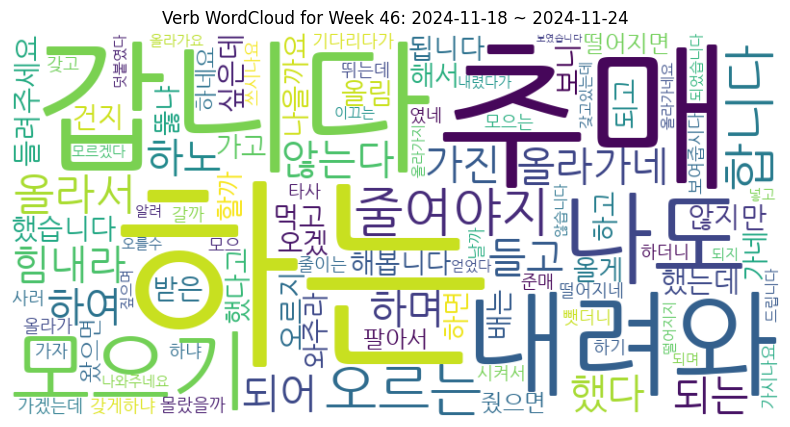

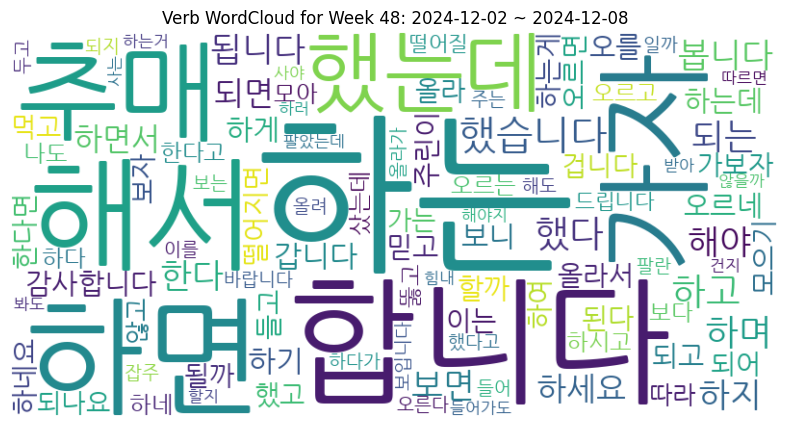

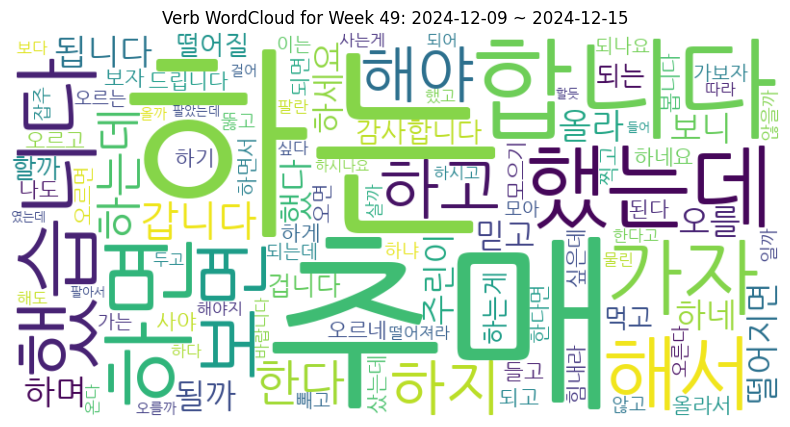

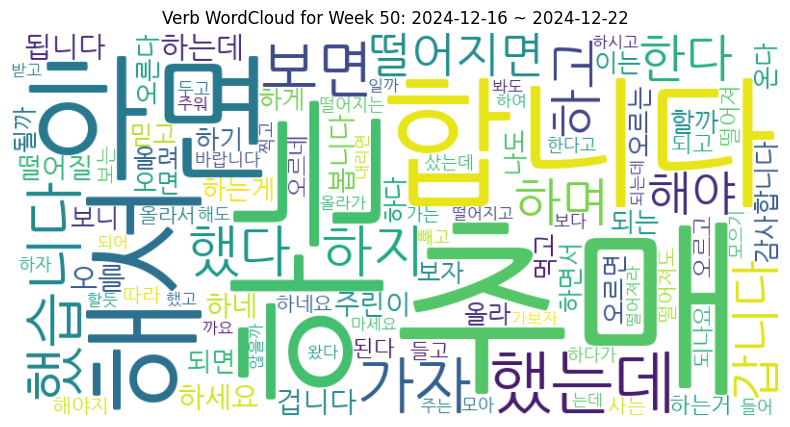

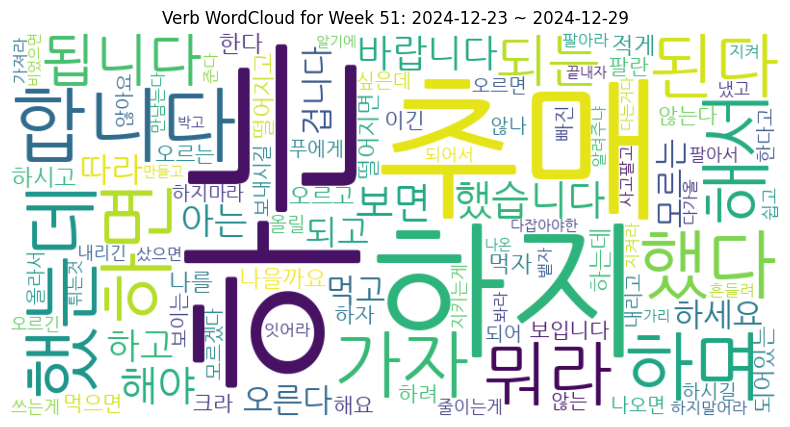

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from konlpy.tag import Okt
import re

def extract_verbs(text, okt):
    # KoNLPy의 pos 태깅 결과에서 동사 추출
    pos_tags = okt.pos(text)
    verbs = []
    for word, pos in pos_tags:
        # 'Verb': 동사만 추출
        if pos == 'Verb' and len(word) > 1:  # 2글자 이상 동사만
            verbs.append(word)
    return verbs

def create_verb_wordcloud(comments, title):
    okt = Okt()
    
    # 모든 코멘트를 하나의 문자열로 합치기
    text = ' '.join(comments)
    
    # 특수문자 및 이모지 제거
    text = re.sub(r'[^\w\s가-힣]', ' ', text)
    
    # 동사 추출
    verbs = extract_verbs(text, okt)
    
    # 빈도수 계산
    verb_counts = Counter(verbs)
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(verb_counts)
    
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 각 주차별로 워드클라우드 생성
for week_key, comments in weeklyComments.items():
    create_verb_wordcloud(comments, f'Verb WordCloud for {week_key}')
